In [1]:
import pandas as pd
import seaborn as srn
import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
data = pd.read_excel('C:\\Users\\Riallen\\Documents\\Print_de_telas\\data2\\data_geral.xlsx')
data.head()

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9


In [3]:
data['Odds'].describe()

count    3308.000000
mean        9.271333
std        91.754512
min         1.000000
25%         1.290000
50%         1.960000
75%         3.937500
max      4339.900000
Name: Odds, dtype: float64

In [4]:
data['Qt_Apostadores'].describe()

count    3308.000000
mean     2100.227932
std      1009.730459
min        42.000000
25%      1435.000000
50%      2074.000000
75%      2787.000000
max      5180.000000
Name: Qt_Apostadores, dtype: float64

In [5]:
data['hour'].describe()

count    3308.000000
mean       10.901149
std         6.877314
min         0.000000
25%         5.000000
50%        11.000000
75%        17.000000
max        23.000000
Name: hour, dtype: float64

Text(0.5, 1.0, 'Odds')

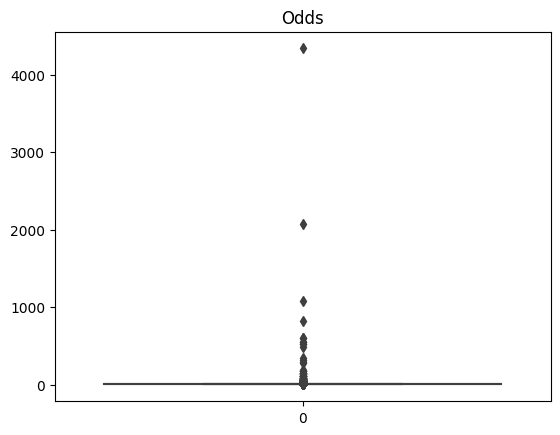

In [6]:
srn.boxplot(data['Odds']).set_title('Odds')

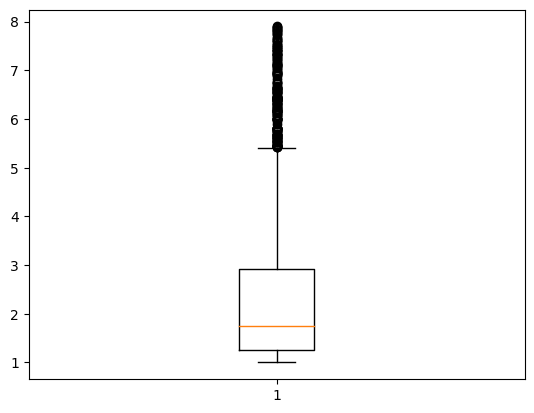

In [8]:
data_box_plot = np.array(data['Odds'])
q1 = np.percentile(data_box_plot, 25)
q3 = np.percentile(data_box_plot, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_sem_outliers = [x for x in data_box_plot if x > lower_bound and x < upper_bound]

# Plotar o boxplot sem outliers
plt.boxplot(data_sem_outliers)
plt.show()

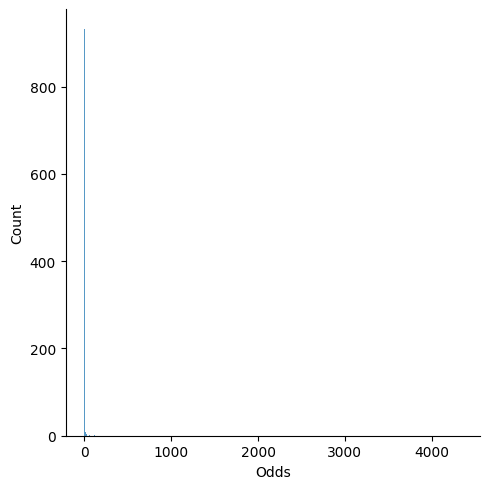

In [9]:
srn.displot(data['Odds'])

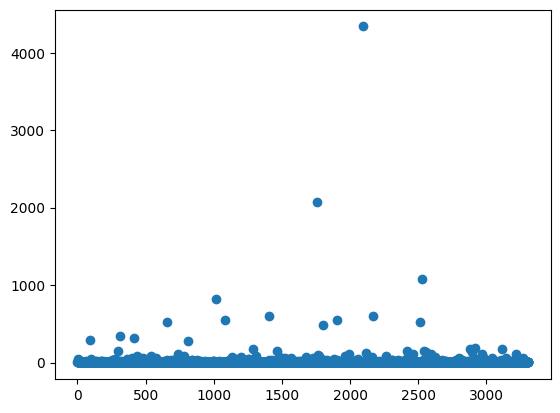

In [10]:
x = np.array(range(0,3308,1))
y = np.array(data['Odds'])
plt.scatter(x,y)

In [11]:
moda = statistics.mode(y)
moda

1.0

In [12]:
data['Odds'].value_counts()

1.00      118
1.01       36
1.07       35
1.05       34
1.06       34
         ... 
336.49      1
4.60        1
8.38        1
3.88        1
11.52       1
Name: Odds, Length: 888, dtype: int64

In [13]:
data[data["Odds"] == 1.00] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
16,1.0,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
141,1.0,1600,Mon Feb 13 10:30:52 2023,2023-02-13 10:30:52,2023-02-13,10:30:52,10
165,1.0,1824,Mon Feb 13 10:40:22 2023,2023-02-13 10:40:22,2023-02-13,10:40:22,10
189,1.0,1953,Mon Feb 13 10:49:37 2023,2023-02-13 10:49:37,2023-02-13,10:49:37,10
203,1.0,2536,Mon Feb 13 10:55:31 2023,2023-02-13 10:55:31,2023-02-13,10:55:31,10
...,...,...,...,...,...,...,...
3176,1.0,1725,Tue Feb 14 08:36:12 2023,2023-02-14 08:36:12,2023-02-14,08:36:12,8
3219,1.0,2110,Tue Feb 14 08:54:32 2023,2023-02-14 08:54:32,2023-02-14,08:54:32,8
3250,1.0,2549,Tue Feb 14 09:07:26 2023,2023-02-14 09:07:26,2023-02-14,09:07:26,9
3259,1.0,1995,Tue Feb 14 09:10:51 2023,2023-02-14 09:10:51,2023-02-14,09:10:51,9


In [14]:
data[data["Odds"] <= 1.61] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
7,1.60,2502,Mon Feb 13 09:36:59 2023,2023-02-13 09:36:59,2023-02-13,09:36:59,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [15]:
data[data["Odds"] <= 1.45] 

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3299,1.36,2194,Tue Feb 14 09:27:28 2023,2023-02-14 09:27:28,2023-02-14,09:27:28,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [17]:
data[data["Odds"] <= 1.28]

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
5,1.25,1740,Mon Feb 13 09:36:16 2023,2023-02-13 09:36:16,2023-02-13,09:36:16,9
11,1.03,1778,Mon Feb 13 09:39:33 2023,2023-02-13 09:39:33,2023-02-13,09:39:33,9
13,1.05,1885,Mon Feb 13 09:40:12 2023,2023-02-13 09:40:12,2023-02-13,09:40:12,9
16,1.00,2117,Mon Feb 13 09:41:21 2023,2023-02-13 09:41:21,2023-02-13,09:41:21,9
...,...,...,...,...,...,...,...
3293,1.27,2477,Tue Feb 14 09:24:53 2023,2023-02-14 09:24:53,2023-02-14,09:24:53,9
3302,1.27,2207,Tue Feb 14 09:28:26 2023,2023-02-14 09:28:26,2023-02-14,09:28:26,9
3304,1.22,2137,Tue Feb 14 09:29:04 2023,2023-02-14 09:29:04,2023-02-14,09:29:04,9
3305,1.01,1793,Tue Feb 14 09:29:19 2023,2023-02-14 09:29:19,2023-02-14,09:29:19,9


In [ ]:
data[data["Odds"] >= 2.5]

In [ ]:
data[data["Odds"] >= 3.83]

In [ ]:
data['Qt_Apostadores'].describe()

In [ ]:
x = np.array(range(0,501,1))
y = np.array(data['Qt_Apostadores'])
plt.bar(x,y)

In [ ]:
i = 0
t = len(data['Hora_Aposta'])
#print(t)
segundo = []
minuto = []
for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['Hora_Aposta'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))

for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hour']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data['hour_edi']

In [ ]:
data['hour_edi'].describe()

In [ ]:
data['hour']

In [ ]:
data_hora_145 = data[data['Odds']> 1.45]
data_hora_145

In [ ]:
x = np.array(data_hora_145['hour_edi'])
y = np.array(data_hora_145['Odds'])

plt.plot(x,y)

In [ ]:
data_hora3 = data[data['hour'] == 3]
data_hora3

In [ ]:
data_hora3[data_hora3['Odds'] >= 1.45]
#print(len(data_hora3[data_hora3['Odds'] >= 1.45]))

In [ ]:
#Proporção de ods acima de 1.45
p_1453 = len(data_hora3[data_hora3['Odds'] >= 1.45])/len(data_hora3['Odds'])
p_1453

In [ ]:
data_hora4 = data[data['hour'] == 4]
data_hora4

In [ ]:
data_hora4[data_hora4['Odds'] >= 1.45]

In [ ]:
#Proporção de ods acima de 1.45
p_1454 = len(data_hora4[data_hora4['Odds'] >= 1.45])/len(data_hora4['Odds'])
p_1454

In [ ]:
data_hora5 = data[data['hour'] == 5]
data_hora5

In [ ]:
data_hora5[data_hora5['Odds'] >= 1.35]

In [ ]:
#Proporção de ods acima de 1.45
p_1455 = len(data_hora5[data_hora5['Odds'] >= 1.35])/len(data_hora5['Odds'])
p_1455

In [ ]:
data_hora6 = data[data['hour'] == 6]
data_hora6

In [ ]:
data_hora6[data_hora6['Odds'] >= 1.45]

In [ ]:
#Proporção de ods acima de 1.45
p_1456 = len(data_hora6[data_hora6['Odds'] >= 1.45])/len(data_hora6['Odds'])
p_1456

In [ ]:
data_hora7 = data[data['hour'] == 7]
data_hora7

In [ ]:
data_hora7[data_hora7['Odds']>=1.45]

In [ ]:
#Proporção de ods acima de 1.45
p_1457 = len(data_hora7[data_hora7['Odds'] >= 1.45])/len(data_hora7['Odds'])
p_1457